## The dataset used for this data analysis：`Appearances.csv`

**The first row of the uploaded file 'Appearances.csv' contains the field names for the dataset, representing the meaning of each column in the dataset. Here are the meanings of each field name:**

- `yearID`: Year Identifier
- `teamID`: Team Identifier
- `lgID`: League Identifier
- `playerID`: Player Identifier
- `G_all`: Total Appearances
- `GS`: Games Started
- `G_batting`: Batting Appearances
- `G_defense`: Defensive Appearances
- `G_p`: Pitching Appearances
- `G_c`: Catcher Appearances
- `G_1b`: First Base Appearances
- `G_2b`: Second Base Appearances
- `G_3b`: Third Base Appearances
- `G_ss`: Shortstop Appearances
- `G_lf`: Left Field Appearances
- `G_cf`: Center Field Appearances
- `G_rf`: Right Field Appearances
- `G_of`: Total Outfield Appearances
- `G_dh`: Designated Hitter Appearances
- `G_ph`: Pinch Hitter Appearances
- `G_pr`: Pinch Runner Appearances

### Average annual appearances per player

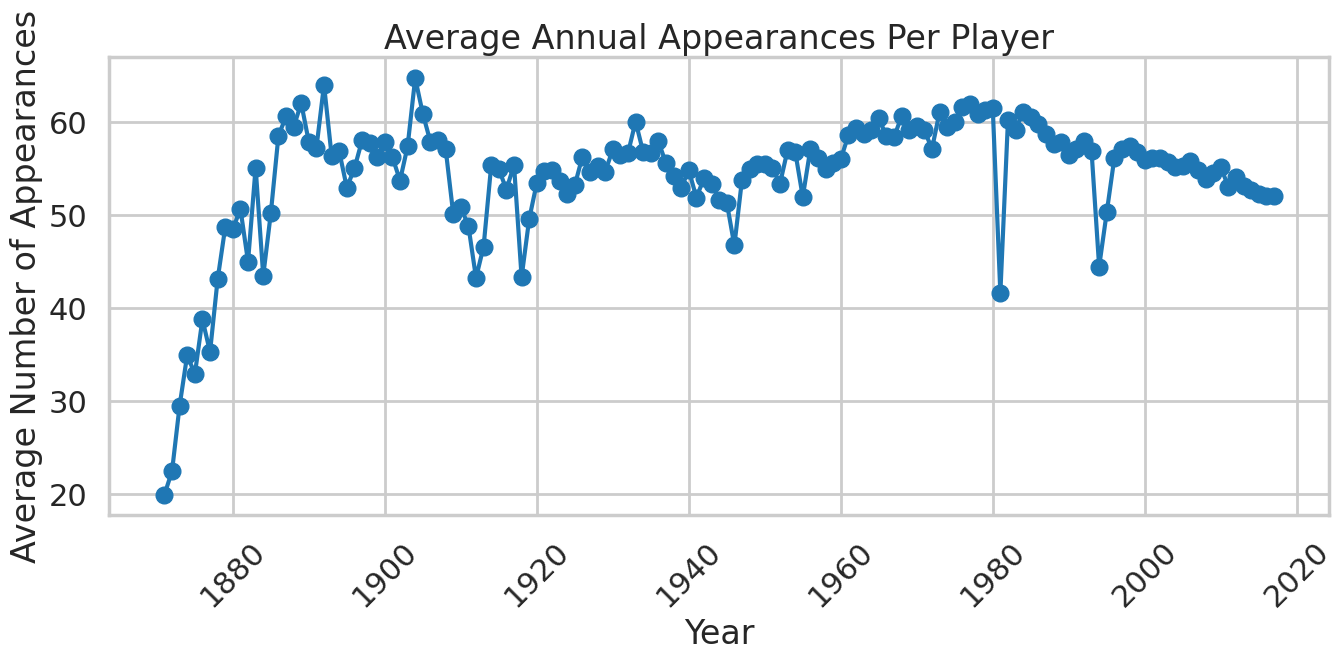

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV Data
df = pd.read_csv('Appearances.csv')

# Group the data by year and player, and calculate the total appearances for each player per year.
yearly_appearances = df.groupby(['yearID', 'playerID']).agg({'G_all': 'sum'}).reset_index()

# Calculate the average number of appearances for each year.
average_appearances_per_year = yearly_appearances.groupby('yearID')['G_all'].mean().reset_index()

# Set Matplotlib to use English fonts.
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

# Generate charts using Matplotlib.
plt.figure(figsize=(14, 7))
plt.plot(average_appearances_per_year['yearID'], average_appearances_per_year['G_all'], marker='o')
plt.title('Average Annual Appearances Per Player')
plt.xlabel('Year')
plt.ylabel('Average Number of Appearances')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the layout to accommodate all labels.

# Display the chart.
plt.show()

**The chart displays the average annual appearances per player. Based on this chart, we can perform the following analysis:**

- In the early records, we can observe a rapid increase in the average number of appearances. This could be attributed to the early development of baseball and the increasing level of professionalism in the sport.
<br>

- From the early to mid-20th century, the number of appearances remained relatively stable but experienced some fluctuations. These fluctuations might be related to the socio-economic conditions of the time, player mobilization during World Wars, or other significant events.
<br>

- In the latter half of the 20th century, there was a noticeable decline in the number of appearances. This could be due to changes in team strategies, the implementation of player rotation policies, or adjustments in the structure of baseball seasons.
<br>

- In recent years, we can see a decrease in the number of appearances, which may reflect the modern emphasis on player health and rest, as well as teams giving more importance to the long-term performance and career planning of players.

## The dataset used for this data analysis：`Appearances.csv`

### Average number of appearances for players in different baseball positions

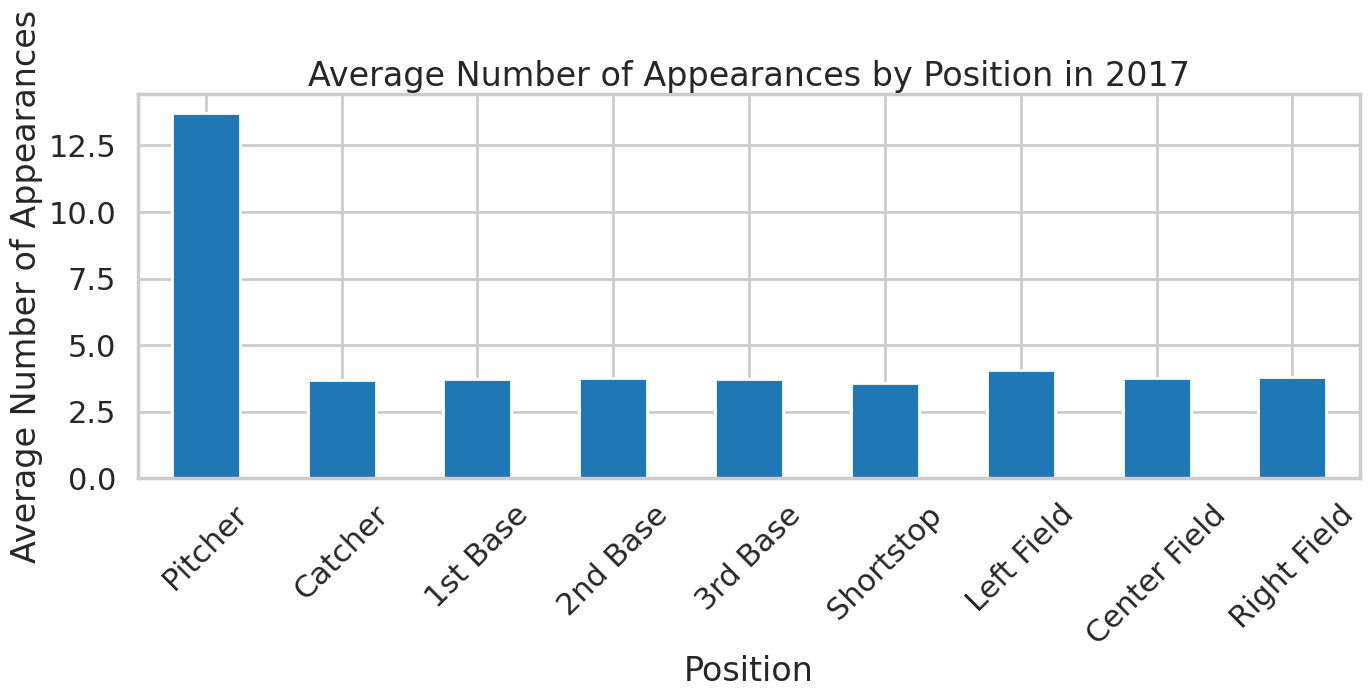

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV data
df = pd.read_csv('Appearances.csv')

# Analyze the average number of appearances for players in different positions
positions = ['G_p', 'G_c', 'G_1b', 'G_2b', 'G_3b', 'G_ss', 'G_lf', 'G_cf', 'G_rf']
position_appearances = df.groupby('yearID')[positions].mean().reset_index()

# Set Matplotlib to use English fonts
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

# Display data for the most recent year only
recent_year = position_appearances['yearID'].max()
recent_data = position_appearances[position_appearances['yearID'] == recent_year].iloc[0]
positions_data = recent_data[positions]

# Create a bar chart
plt.figure(figsize=(14, 7))
positions_data.plot(kind='bar')
plt.title(f'Average Number of Appearances by Position in {recent_year}')
plt.xlabel('Position')
plt.ylabel('Average Number of Appearances')
plt.xticks(range(len(positions)), ['Pitcher', 'Catcher', '1st Base', '2nd Base', '3rd Base', 'Shortstop', 'Left Field', 'Center Field', 'Right Field'], rotation=45)
plt.tight_layout()

# Display the chart
plt.show()

**The generated bar chart represents the average number of appearances for players in different baseball positions in the past year. Based on this chart, we can observe the following analysis:**

- The average number of appearances for pitchers is significantly higher than other positions. This is likely due to the prevalence of pitcher rotation systems, where multiple pitchers typically appear in each game.
<br>

- Catchers have relatively lower numbers of appearances. This might be because the catcher position demands high physical and mental endurance, leading to fewer consecutive appearances.
<br>

- First base, second base, third base, and shortstop have relatively balanced numbers of appearances. This could reflect less rotation of players in the infield defensive positions.


- Outfielders (left field, center field, right field) also have relatively balanced numbers of appearances, suggesting a more consistent rotation strategy for outfield positions compared to the infield.

This type of analysis helps in understanding the differences in player usage strategies for different positions and can provide insights into overall team tactics and player health management. Tactical arrangements and player fitness management are important factors to consider when developing these rotation strategies.

## The dataset used for this data analysis：`Batting.csv` and `Pitching.csv`

### A analysis of if the introduction of the sidearm throw made batters worse at hitting the ball.

In [64]:
#Imports
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [65]:
#read data file
battingDataSet = pd.read_csv("Batting.csv")
pitchingDataSet = pd.read_csv("Pitching.csv")


In [66]:
#combine years
battingDataSet = battingDataSet.groupby('yearID').sum()
battingDataSet = battingDataSet.reset_index()
#battingDataSet.head()
#Get hits/ab per year
battingDataSet['H/AB'] = battingDataSet['H']/battingDataSet['AB']
battingDataSet['H/AB'] = battingDataSet['H/AB'].fillna(0)
#battingDataSet.head()
#remove unneeded columns
battingDataSet = battingDataSet.drop(['stint','G','AB','R','H','2B','3B','HR','BB','SO','HBP','SH','SF','IBB'], axis=1)
#battingDataSet.head()

/var/folders/5p/c8k15d1n7dj9rb5syj6hv44r0000gn/T/ipykernel_26565/4000117314.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  battingDataSet = battingDataSet.groupby('yearID').sum()


In [67]:
pitchingDataSet = pitchingDataSet.groupby('yearID').sum()
pitchingDataSet = pitchingDataSet.reset_index()
#pitchingDataSet.head()
#get average (wb+hpb)/pitches per year
pitchingDataSet['WH/P'] = (pitchingDataSet['W']+pitchingDataSet['HBP'])/pitchingDataSet['H']
pitchingDataSet['WH/P'] = pitchingDataSet['WH/P'].fillna(0)
#pitchingDataSet.head()
#remove unneeded columns
pitchingDataSet = pitchingDataSet.drop(['stint','G','W','L','R','SHO','SV','IPouts','H','ER','HR','BB','SO','BAOpp','ERA','IBB','WP','HBP','BK','BFP','GF','R','SH','SF','GIDP'], axis=1)
#pitchingDataSet.head()

/var/folders/5p/c8k15d1n7dj9rb5syj6hv44r0000gn/T/ipykernel_26565/2020338468.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pitchingDataSet = pitchingDataSet.groupby('yearID').sum()


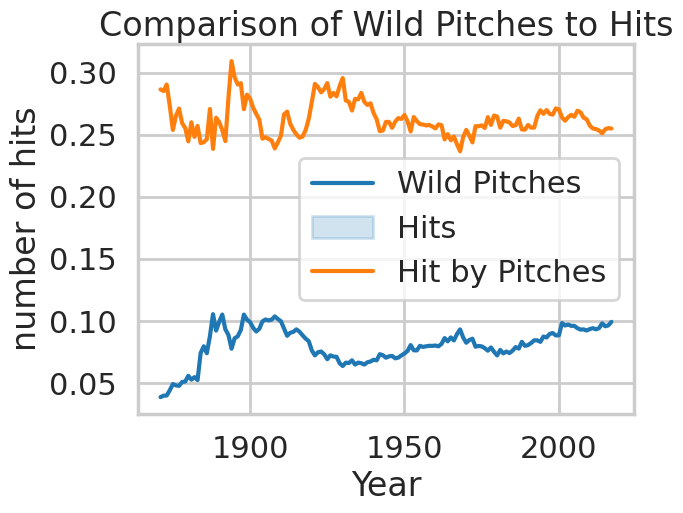

In [68]:
#plot plot average hits per year line
#plot average wild pitches per year line

sns.lineplot(x='yearID', y='WH/P', data=pitchingDataSet)
sns.lineplot(x='yearID', y='H/AB', data=battingDataSet)

plt.title('Comparison of Wild Pitches to Hits')
plt.xlabel('Year')
plt.ylabel('number of hits')
plt.legend(['Wild Pitches','Hits','Hit by Pitches'])

#plot the data
plt.show()

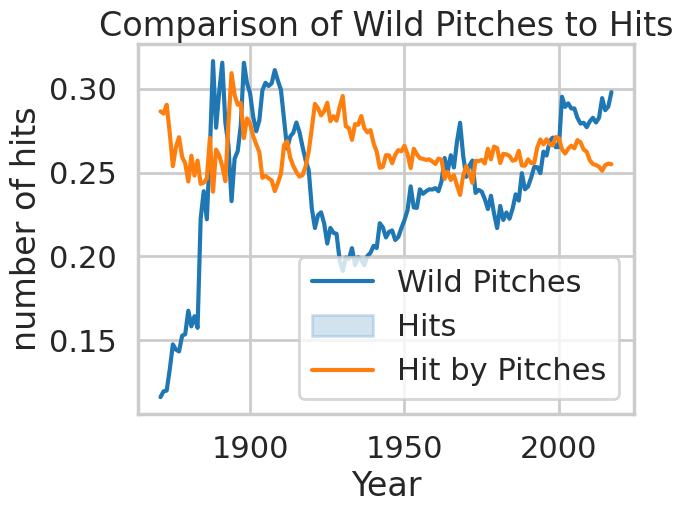

In [69]:
#plot plot average hits per year line
#plot average wild pitches per year line

#scale both lines so they overlap and are easier to compare (scale wild pitches by 3)
pitchingDataSet['WH/P'] = pitchingDataSet['WH/P']*3
battingDataSet['H/AB'] = battingDataSet['H/AB']
sns.lineplot(x='yearID', y='WH/P', data=pitchingDataSet)
sns.lineplot(x='yearID', y='H/AB', data=battingDataSet)

plt.title('Comparison of Wild Pitches to Hits')
plt.xlabel('Year')
plt.ylabel('number of hits')
plt.legend(['Wild Pitches','Hits','Hit by Pitches'])

#plot the data
plt.show()

As we can see from the graph, wild pitches and batter hits are seemingly related. With an increase in wild pitches (sidearm throws, sliders, and other odd pitching techniques that result in an uncaught ball by the baseman) the number of hits decreases. The opposite is true when the number of wild pitches decreases, batting averages increase in that case.

## The dataset used for this data analysis：`Batting.csv` and `Pitching.csv`

See if moving the pitching mound back helped or harmed pitcher and batter performance in 1893. Pitcher mound was moved back from 50 feet to 60 feet 6 inches in 1893.

Study on data from 1890-1895.

In [70]:
#imports
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [71]:
#read data file
battingDataSet = pd.read_csv("Batting.csv")
pitchingDataSet = pd.read_csv("Pitching.csv")

In [72]:
#batting dataset
battingDataSet = battingDataSet.groupby('yearID').sum()
battingDataSet = battingDataSet.reset_index()
battingDataSet = battingDataSet[battingDataSet['yearID'] >= 1890]
battingDataSet = battingDataSet[battingDataSet['yearID'] <= 1896]
battingDataSet['H/AB'] = battingDataSet['H']/battingDataSet['AB']
battingDataSet['H/AB'] = battingDataSet['H/AB'].fillna(0)
battingDataSet['HR/AB'] = battingDataSet['HR']/battingDataSet['AB']
battingDataSet['HR/AB'] = battingDataSet['HR/AB']*50
#drop columns
battingDataSet = battingDataSet.drop(columns=['stint','G','AB','R','HR','2B','3B','RBI','SB','CS','BB','SO','IBB','HBP','SH','SF','GIDP'])
battingDataSet = battingDataSet.reset_index()


#Pitching strikout averages from years 1890-1896
pitchingDataSet = pitchingDataSet.groupby('yearID').sum()
pitchingDataSet = pitchingDataSet.reset_index()
pitchingDataSet = pitchingDataSet[pitchingDataSet['yearID'] >= 1890]
pitchingDataSet = pitchingDataSet[pitchingDataSet['yearID'] <= 1896]
pitchingDataSet['SO/R'] = pitchingDataSet['SO']/pitchingDataSet['R']
pitchingDataSet['SO/R'] = pitchingDataSet['SO/R'].fillna(0)
#remove columns exept for yearID and SO/R R and SO
pitchingDataSet = pitchingDataSet.drop(columns=['stint','G','W','L','CG','SHO','SV','IPouts','H','ER','HR','BB','BAOpp','ERA','IBB','WP','HBP','BK','BFP','GF','R','SH','SF','GIDP'])
pitchingDataSet = pitchingDataSet.reset_index()
#pitchingDataSet.head()
battingDataSet.head()

/var/folders/5p/c8k15d1n7dj9rb5syj6hv44r0000gn/T/ipykernel_26565/1034120085.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  battingDataSet = battingDataSet.groupby('yearID').sum()
/var/folders/5p/c8k15d1n7dj9rb5syj6hv44r0000gn/T/ipykernel_26565/1034120085.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pitchingDataSet = pitchingDataSet.groupby('yearID').sum()


,index,yearID,H,H/AB,HR/AB
0,19,1890,29472,0.260254,0.674655
1,20,1891,19709,0.253786,0.753284
2,21,1892,15643,0.244896,0.652827
3,22,1893,15913,0.279676,0.808464
4,23,1894,17809,0.309308,1.092450


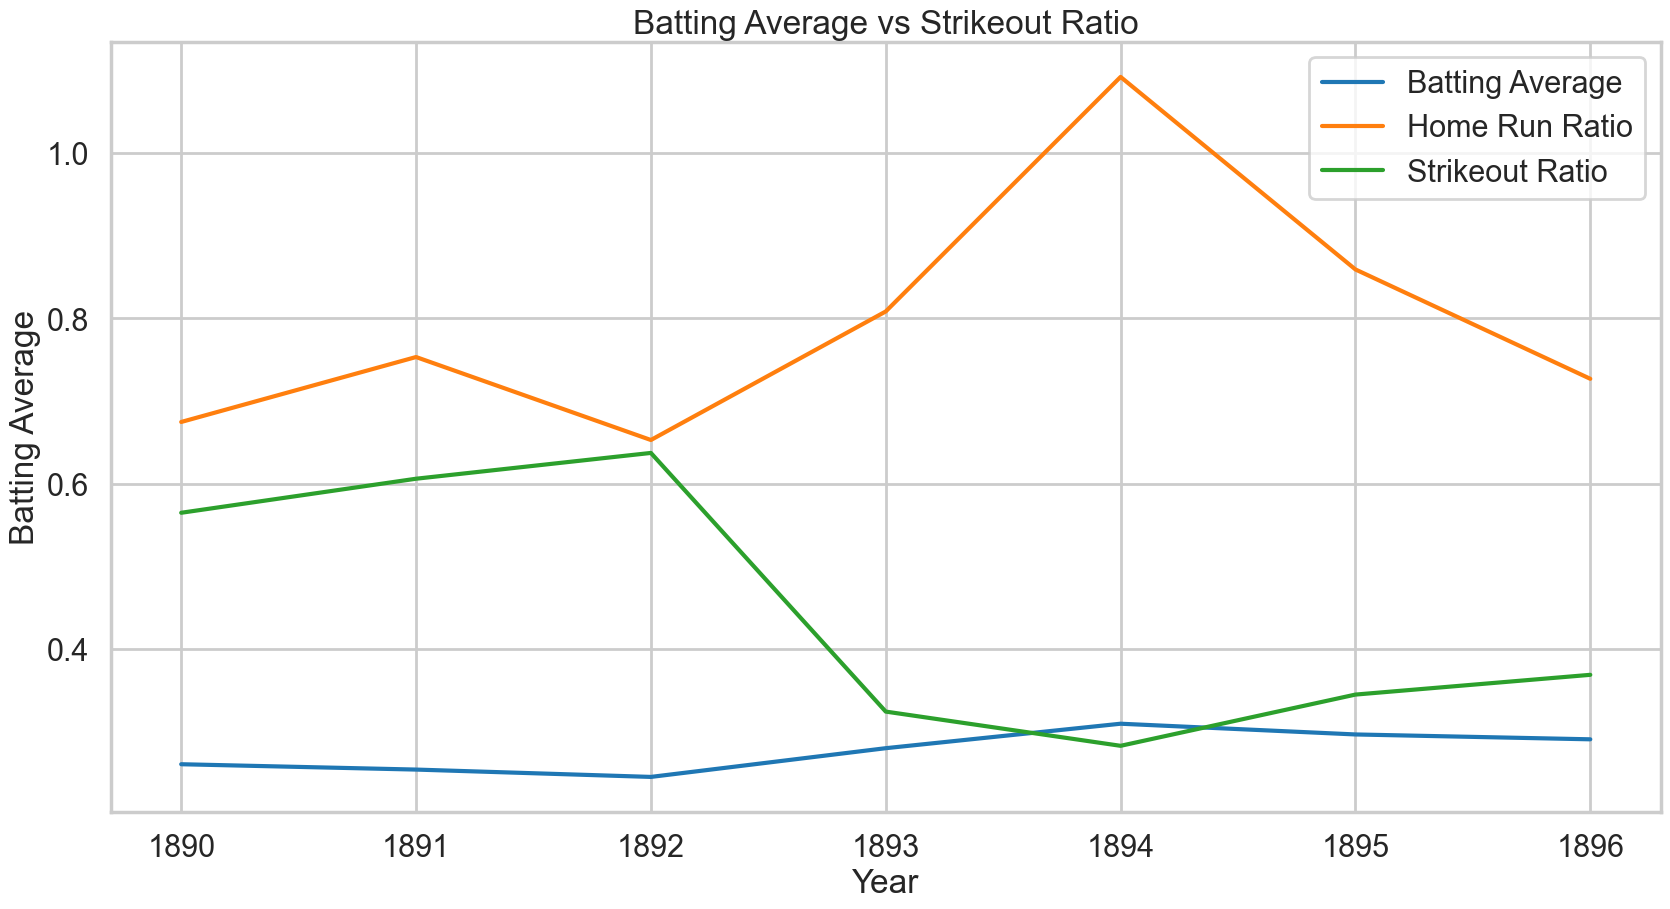

In [73]:
#graphing
sns.set_style("whitegrid")
sns.set_context("poster")
plt.figure(figsize=(20,10))
plt.title("Batting Average vs Strikeout Ratio")
plt.xlabel("Year")
plt.ylabel("Batting Average")
plt.plot(battingDataSet['yearID'], battingDataSet['H/AB'], label="Batting Average")
plt.plot(battingDataSet['yearID'], battingDataSet['HR/AB'], label="Home Run Ratio")
plt.plot(pitchingDataSet['yearID'], pitchingDataSet['SO/R'], label="Strikeout Ratio")
plt.legend()
plt.show()

As we can see, with the rules change in 1893, the number of hits per game increased, and the number of strikeouts per game decreased. This is because the pitcher mound was moved back, making it easier for batters to hit the ball. This also made it harder for pitchers to strike out batters.